In [1]:
import pandas as pd

In [3]:
# Try reading the file with 'Shift_JIS' encoding
df_shiftjis_1 = pd.read_csv('..//data//在庫推移_9月1週目.csv', encoding='Shift_JIS')
# Load the new CSV file into a DataFrame with 'Shift_JIS' encoding
df_shiftjis_2 = pd.read_csv('..//data//在庫推移_9月2週目.csv', encoding='Shift_JIS')
df_shiftjis_3 = pd.read_csv('..//data//在庫推移_9月3週目.csv', encoding='Shift_JIS')
df_shiftjis_4 = pd.read_csv('..//data//在庫推移_9月4週目.csv', encoding='Shift_JIS')

# Combine the old and new data
df_shiftjis = pd.concat([df_shiftjis_1, df_shiftjis_2, df_shiftjis_3, df_shiftjis_4], ignore_index=True)

# Display the first few rows of the DataFrame
df_shiftjis.head()

,計測日時,品番,拠点所番地,在庫数（箱）,入庫数（箱）,出庫数（箱）
0,2023/09/04 00:00:00,019120LC030,30113,12.0,0.0,0.0
1,2023/09/04 00:00:00,019120LC040,10114,3.0,0.0,0.0
2,2023/09/04 00:00:00,019120LC050,20115,4.0,0.0,0.0
3,2023/09/04 00:00:00,019120LC060,30116,9.0,0.0,0.0
4,2023/09/04 00:00:00,019120LC070,20117,9.0,0.0,0.0


In [5]:
import numpy as np

# Get unique product numbers
unique_product_numbers = df_shiftjis['品番'].unique()

# Compute histograms for each product number again
histograms = {}

for product in unique_product_numbers:
    product_data = df_shiftjis[df_shiftjis['品番'] == product]['在庫数（箱）']
    hist, bins = np.histogram(product_data, bins=range(0, int(product_data.max()) + 2))
    histograms[product] = (hist, bins)

# Display histograms for the first few products
list(histograms.items())[:5]

[('019120LC030    ',
  (array([  0,   0,   0,   0,   0,   0,   0,   3,  25,  59,  84,  66,  69,
          117,  45,  10,   2]),
   array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
          17]))),
 ('019120LC040    ', (array([ 0, 25, 28, 78, 26]), array([0, 1, 2, 3, 4, 5]))),
 ('019120LC050    ',
  (array([  0,   0,   0,  32,  77, 225, 146]),
   array([0, 1, 2, 3, 4, 5, 6, 7]))),
 ('019120LC060    ',
  (array([  0,   0,   0,   0,   0,   0,   2,  80, 172, 166,  50,   7,   3]),
   array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))),
 ('019120LC070    ',
  (array([  0,   0,   0,   0,   0,   0,  12,  99, 210, 128,  31]),
   array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])))]

/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 22312 (\N{CJK UNIFIED IDEOGRAPH-5728}) missing from current font.
  
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 24235 (\N{CJK UNIFIED IDEOGRAPH-5EAB}) missing from current font.
  
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from current font.
  
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  
/anaconda/anaconda3/lib/pyt

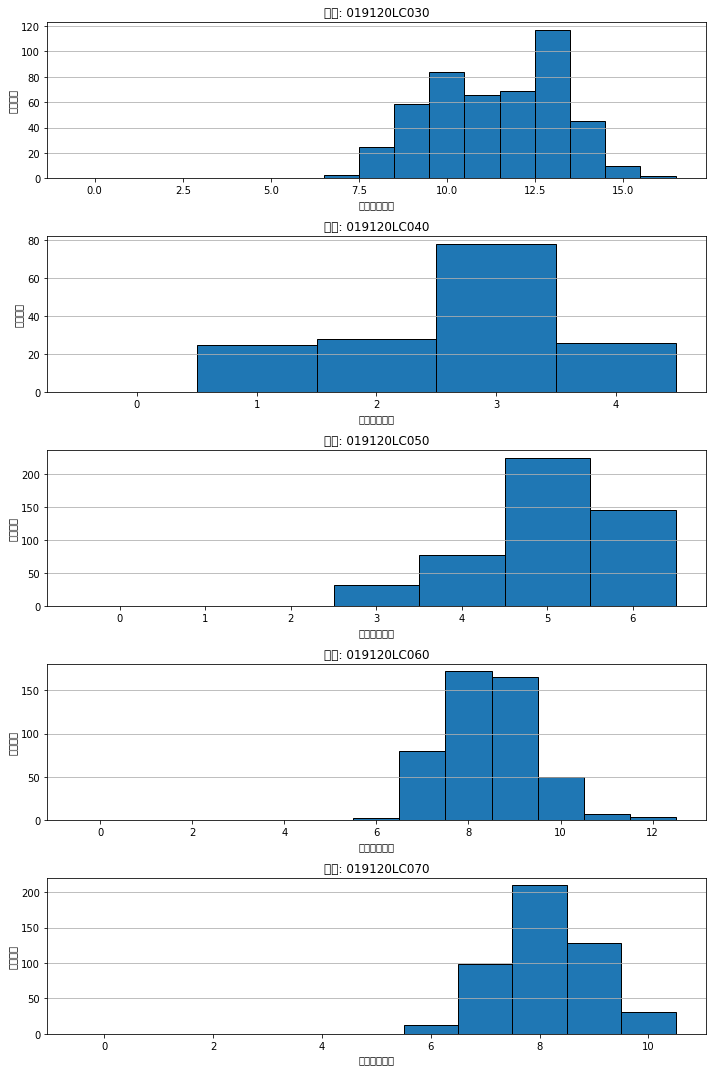

In [7]:
import matplotlib.pyplot as plt

# Display histograms for the first few products
fig, axes = plt.subplots(min(5, len(histograms)), 1, figsize=(10, 15))

for idx, (product, (hist, bins)) in enumerate(list(histograms.items())[:5]):
    ax = axes[idx]
    ax.bar(bins[:-1], hist, width=1, align='center', edgecolor='black')
    ax.set_title(f'品番: {product.strip()}')
    ax.set_xlabel('在庫数（箱）')
    ax.set_ylabel('カウント')
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [52]:
# Load the new CSV file into a DataFrame with 'Shift_JIS' encoding
df_design = pd.read_csv('../data/設計値変更後_202309_手配数_1Y_2次.csv', encoding='Shift_JIS')

# Display the first few rows of the DataFrame
df_design.head()

,品番,加工図符号,設変符号,品名,ステータス,発注区分,整備室,整備室名,手配区分,工程内外製,...,21(木).1,22(金).1,23(土).1,24(日).1,25(月).1,26(火).1,27(水).1,28(木).1,29(金).1,30(土).1
0,35300-ECB010,35300ECB010,NaN,"PUMP ASSY, OIL W/MOTOR",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,877,815,0,0,877,877,822,878,822,0
1,35580-6GA020,355806GA020,A,"ACTUATOR ASSY, SHIFT CONTROL",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,0,0,0,0,0,0,0,0,0,0
2,35580-ECB011,35580ECB011,B,"ACTUATOR ASSY, SHIFT CONTROL",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,378,360,0,0,384,384,355,379,354,0
3,1040 052 001Z,1040052001Z,D,"PLUG, W/HEAD STRAIGHT SCREW",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,499,455,0,0,493,493,467,499,468,0
4,1040 183 011P,1040183011P,C,"BOLT, FLANGE",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,"1,134","1,080",0,0,"1,152","1,152","1,065","1,137","1,062",0


In [63]:
# Calculate the minimum inventory for each product number
min_inventory = df_shiftjis.groupby('品番')['在庫数（箱）'].min().reset_index()

# 品番ごとに在庫状態の割合を計算
df_merge = pd.DataFrame()

count = 0

for i in range(len(min_inventory.iloc[:,1])):
    hinban = min_inventory.loc[i,"品番"]
    hinban2 = hinban.replace("-", "") 
    hinban3 = hinban2.replace(" ", "") 
    for j in range(len(df_design.iloc[:,1])):
        tehaihinban = df_design.loc[j,'品番']
        tehaihinban2 = tehaihinban.replace('-', '')
        if hinban3 == tehaihinban2:
            df_merge.loc[count,'品番'] = hinban3
            # Calculate max and min values for each product number
            daily = int(str(df_design.loc[j,'当月必要数']).replace(',', '')) / df_design.loc[j,'当月稼働日数']
            A = df_design.loc[j,'サイクル間隔']
            B = df_design.loc[j,'サイクル回数']
            C = df_design.loc[j,'サイクル情報']
            #print(i,A,B,C,S,daily,min_inventory.loc[i,'在庫数（箱）'])
            S = int(str(df_design.loc[j,'収容数']).replace(',', ''))
            df_merge.loc[count,'最大値'] = min_inventory.loc[i,'在庫数（箱）'] + (daily / S) /B
            df_merge.loc[count,'最小値'] = 0.1 * (daily/S  * A * (1 + C) / B)
            #print(df_merge['最大値'],df_merge['最大値'])
            count = count + 1

df_merge.head(100)

,品番,最大値,最小値
0,019128GA010,31.168462,3.326166
1,01912ECB010,10.388974,1.108484
2,01912ECB040,30.336923,4.473120
3,01912ECB060,1.788269,0.335014
4,33490ECB010,49.797619,24.008429
...,...,...,...
95,9033106A003,1.099429,0.027641
96,9033114006,1.111929,0.047570
97,9033904A002,1.887524,0.246732
98,9033904A003,1.390381,0.108526


In [48]:
len(df_merge)

340

In [28]:
min_inventory.loc[50:100,"品番"]

50     35145ECB010    
51     35145ECE010    
52     35145ECE020    
53     35165ECE010    
54     351680LC030    
55     351710LC010    
56     351720LC010    
57     35174ECB010    
58     35174ECE010    
59     35174ECE020    
60     3519510A010    
61     35195ECE010    
62     35195TFG010    
63     351980LC020    
64     351980LC030    
65     351980LC040    
66     351988LA010    
67     35198ECE010    
68     352400LC020    
69     352450LC010    
70     35246TFG010    
71     35275TBG010    
72     352800LA010    
73     35300ECB010    
74     35312ECB010    
75     35352ECB010    
76     3539450A010    
77     35409ECB010    
78     354110LC030    
79     35419TRA010    
80     354210LC040    
81     354260LC010    
82     354320LC040    
83     35441ECB010    
84     35441TFA010    
85     354710LC010    
86     354820LC010    
87     3548255A010    
88     35482TFA010    
89     35501ECB010    
90     35505ECB010    
91     35556ECB010    
92     35557ECB010    
93     3558

In [66]:
min_inventory

,品番,在庫数（箱）
0,019120LC030,7.0
1,019120LC040,1.0
2,019120LC050,3.0
3,019120LC060,6.0
4,019120LC070,6.0
...,...,...
335,G9201ECE010,1.0
336,G9351ECB010,1.0
337,G9351ECE010,1.0
338,Y021720076*****,1.0


In [69]:
data = pd.merge(df_merge, histograms, on='品番', how='left')
data.head()

TypeError: Can only merge Series or DataFrame objects, a <class 'dict'> was passed

In [92]:
# Calculate the ratios of values exceeding 80% and below 20% of the maximum value for each product number's histogram
min_ratios = {}
max_ratios = {}

new_below_20_ratios = {}
new_exceeding_80_ratios_updated = {}

for product, (hist, bins) in histograms.items():
    product2 = product.replace("-", "") 
    product3 = product2.replace(" ", "") 
    for i in range(len(df_merge.iloc[:,1])):
        hinban = df_merge.loc[i,"品番"]
        hinban2 = hinban.replace("-", "") 
        hinban3 = hinban2.replace(" ", "") 
        if product3 == hinban3:
            #print(hinban3)
            threshold_80 = df_merge.loc[i,"最大値"]
            threshold_20 = df_merge.loc[i,"最小値"]
    
            total_count = hist.sum()

            exceeding_80_ratio = np.sum(hist[hist > threshold_80]) / total_count if total_count > 0 else 0
            below_20_ratio = np.sum(hist[hist < threshold_20]) / total_count if total_count > 0 else 0

            #print(exceeding_80_ratio)
            
            new_exceeding_80_ratios_updated[product] = exceeding_80_ratio
            new_below_20_ratios[product] = below_20_ratio

# Convert dictionaries to DataFrame for better visualization
df_kari = pd.DataFrame({
    '品番': list(new_exceeding_80_ratios_updated.keys()),
    '設計値MAXを超える割合': list(new_exceeding_80_ratios_updated.values()),
    '設計値MINを下回る割合': list(new_below_20_ratios.values())
})

# Display the DataFrame
df_kari.head(100)

with open('..//data/順立装置の在庫.csv', mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    df_kari.to_csv(f)

In [83]:
histgrams

NameError: name 'histgrams' is not defined

In [84]:
histograms

{'019120LC030    ': (array([  0,   0,   0,   0,   0,   0,   0,   3,  25,  59,  84,  66,  69,
         117,  45,  10,   2]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17])),
 '019120LC040    ': (array([ 0, 25, 28, 78, 26]), array([0, 1, 2, 3, 4, 5])),
 '019120LC050    ': (array([  0,   0,   0,  32,  77, 225, 146]),
  array([0, 1, 2, 3, 4, 5, 6, 7])),
 '019120LC060    ': (array([  0,   0,   0,   0,   0,   0,   2,  80, 172, 166,  50,   7,   3]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])),
 '019120LC070    ': (array([  0,   0,   0,   0,   0,   0,  12,  99, 210, 128,  31]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])),
 '019128GA010    ': (array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  6,  6,  3,  4, 10,  9, 25,
         22, 19, 32, 32, 41, 37, 37, 31, 37, 22, 25, 13, 10, 16,  9, 14,  8,
          4,  2,  2,  1]),
  array([ 0,  1,  2